In [1]:
#I import libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')
import xgboost as xgb
from xgboost import XGBRegressor

In [3]:
#I take csv files and take a first look

In [4]:
ad1 = pd.read_csv("audi.csv")
df1 = ad1.copy()
df1['model'] = 'Audi_' + df1['model']

In [5]:
df1.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi_ A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi_ A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi_ A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi_ A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi_ A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [6]:
ad2 = pd.read_csv("bmw.csv")
df2 = ad2.copy()
df2['model'] = 'bmw_' + df2['model']

In [7]:
df2.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,bmw_ 5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,bmw_ 6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,bmw_ 5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,bmw_ 1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,bmw_ 7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [8]:
ad3 = pd.read_csv("ford.csv")
df3 = ad3.copy()
df3['model'] = 'ford_' + df3['model']

In [9]:
df3.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,ford_ Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,ford_ Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,ford_ Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,ford_ Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,ford_ Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [10]:
ad4 = pd.read_csv("hyundi.csv")
df4 = ad4.copy()
df4['model'] = 'hyundi_' + df4['model']

In [11]:
df4.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,hyundi_ I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,hyundi_ Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,hyundi_ Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,hyundi_ I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,hyundi_ IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [12]:
df4.rename(columns={"tax(£)": "tax"}, inplace=True)

In [13]:
df4.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,hyundi_ I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,hyundi_ Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,hyundi_ Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,hyundi_ I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,hyundi_ IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [14]:
ad5 = pd.read_csv("mercedes.csv")
df5 = ad5.copy()
df5['model'] = 'mercedes_' + df5['model']

In [15]:
df5.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,mercedes_ SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,mercedes_ S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,mercedes_ SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,mercedes_ G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,mercedes_ G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [16]:
ad6 = pd.read_csv("skoda.csv")
df6 = ad6.copy()
df6['model'] = 'skoda_' + df6['model']

In [17]:
df6.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,skoda_ Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,skoda_ Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,skoda_ Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,skoda_ Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,skoda_ Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [18]:
ad7 = pd.read_csv("toyota.csv")
df7 = ad7.copy()
df7['model'] = 'toyota_' + df7['model']

In [19]:
df7.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,toyota_ GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,toyota_ GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,toyota_ GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,toyota_ GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,toyota_ GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [20]:
ad8 = pd.read_csv("vw.csv")
df8 = ad8.copy()
df8['model'] = 'vw_' + df8['model']

In [21]:
df8.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,vw_ T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,vw_ T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,vw_ T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,vw_ T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,vw_ T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


In [22]:
#I merge all the files

In [23]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8])
df.to_csv('merged_file.csv', index=False)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85555 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         85555 non-null  object 
 1   year          85555 non-null  int64  
 2   price         85555 non-null  int64  
 3   transmission  85555 non-null  object 
 4   mileage       85555 non-null  int64  
 5   fuelType      85555 non-null  object 
 6   tax           85555 non-null  int64  
 7   mpg           85555 non-null  float64
 8   engineSize    85555 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.5+ MB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,85555.0,2017.108305,2.127201,1970.0,2016.0,2017.0,2019.0,2060.0
price,85555.0,17824.921793,10162.376307,495.0,10790.0,15700.0,21998.0,159999.0
mileage,85555.0,22988.745076,21312.435922,1.0,7041.0,17232.0,32345.0,323000.0
tax,85555.0,118.950733,64.404267,0.0,125.0,145.0,145.0,580.0
mpg,85555.0,55.745505,16.839501,0.3,47.1,55.4,62.8,470.8
engineSize,85555.0,1.702485,0.584701,0.0,1.2,1.6,2.0,6.6


In [26]:
df["model"].value_counts()

model
ford_ Fiesta         6557
vw_ Golf             4863
ford_ Focus          4588
mercedes_ C Class    3747
vw_ Polo             3287
                     ... 
ford_ Ranger            1
Audi_ RS7               1
Audi_ A2                1
mercedes_220            1
mercedes_200            1
Name: count, Length: 173, dtype: int64

In [27]:
df["model"].nunique()

173

In [28]:
df["transmission"].value_counts()

transmission
Manual       44465
Semi-Auto    22212
Automatic    18872
Other            6
Name: count, dtype: int64

In [29]:
df["fuelType"].value_counts()

fuelType
Petrol      44123
Diesel      38105
Hybrid       3076
Other         246
Electric        5
Name: count, dtype: int64

In [30]:
#one hot encoding

In [31]:
df = pd.get_dummies(df, columns=['fuelType'])

In [32]:
df = pd.get_dummies(df, columns=['transmission'])

In [33]:
df=df.drop(["transmission_Other"],axis=1)

In [34]:
df=df.drop(["fuelType_Electric"],axis=1)

In [35]:
df=df.drop(["fuelType_Other"],axis=1)

In [36]:
df = pd.get_dummies(df, columns=['model'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85555 entries, 0 to 15156
Columns: 185 entries, year to model_vw_ Up
dtypes: bool(179), float64(2), int64(4)
memory usage: 19.2 MB


In [38]:
#185 columns are too many so I only choose the columns that are correlated with price

In [39]:
corr_matrix=df.corr()
sorted_corr=corr_matrix["price"].sort_values()

In [40]:
filtered_corr = sorted_corr[(sorted_corr > 0.065) | (sorted_corr < -0.065)]
print(filtered_corr)

transmission_Manual         -0.530928
mileage                     -0.432412
mpg                         -0.338206
model_ford_ Fiesta          -0.216271
fuelType_Petrol             -0.196463
model_toyota_ Aygo          -0.149503
model_vw_ Polo              -0.127526
model_toyota_ Yaris         -0.114118
model_hyundi_ I10           -0.112818
model_ford_ Focus           -0.108666
model_skoda_ Fabia          -0.106570
model_vw_ Up                -0.098490
model_skoda_ Citigo         -0.079713
model_ford_ Ka+             -0.070899
model_hyundi_ I20           -0.067735
model_Audi_ Q3               0.066077
model_bmw_ 7 Series          0.066230
model_bmw_ X4                0.067119
model_mercedes_ V Class      0.070859
model_bmw_ M5                0.072362
model_vw_ Caravelle          0.072737
model_mercedes_ SL CLASS     0.072760
model_bmw_ X3                0.078697
model_Audi_ RS6              0.080147
model_mercedes_ GLS Class    0.085105
model_bmw_ X6                0.090159
model_bmw_ M

In [41]:
selected_columns = ["transmission_Manual",
                    "mileage",
                    "mpg",
                    "model_ford_ Fiesta",
                    "fuelType_Petrol",
                    "model_toyota_ Aygo",
                    "model_vw_ Polo",
                    "model_toyota_ Yaris",
                    "model_hyundi_ I10",
                    "model_ford_ Focus",
                    "model_skoda_ Fabia",
                    "model_vw_ Up",
                    "model_skoda_ Citigo",
                    "model_ford_ Ka+",
                    "model_mercedes_ V Class",
                    "model_hyundi_ I20",
                    "model_Audi_ Q3",
                    "model_bmw_ 7 Series",
                    "model_bmw_ X4",
                    "model_bmw_ M5",
                    "model_vw_ Caravelle",
                    "model_mercedes_ SL CLASS",
                    "model_bmw_ X3",
                    "model_bmw_ X6",
                    "model_Audi_ RS6",
                    "model_mercedes_ GLS Class",
                    "model_bmw_ M4",
                    "model_vw_ Touareg",
                    "model_bmw_ 8 Series",
                    "model_mercedes_ G Class",
                    "model_mercedes_ E Class",
                    "model_Audi_ Q8",
                    "model_mercedes_ C Class",
                    "model_Audi_ Q5",
                    "model_mercedes_ S Class",
                    "model_bmw_ X7",
                    "model_Audi_ R8",
                    "model_mercedes_ GLC Class",
                    "model_bmw_ X5",
                    "model_mercedes_ GLE Class",
                    "model_Audi_ Q7",
                    "fuelType_Diesel",
                    "transmission_Automatic",
                    "tax",
                    "transmission_Semi-Auto",
                    "year",
                    "engineSize",
                    "price"]
df = df[selected_columns]

In [42]:
df=df.dropna()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85555 entries, 0 to 15156
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transmission_Manual        85555 non-null  bool   
 1   mileage                    85555 non-null  int64  
 2   mpg                        85555 non-null  float64
 3   model_ford_ Fiesta         85555 non-null  bool   
 4   fuelType_Petrol            85555 non-null  bool   
 5   model_toyota_ Aygo         85555 non-null  bool   
 6   model_vw_ Polo             85555 non-null  bool   
 7   model_toyota_ Yaris        85555 non-null  bool   
 8   model_hyundi_ I10          85555 non-null  bool   
 9   model_ford_ Focus          85555 non-null  bool   
 10  model_skoda_ Fabia         85555 non-null  bool   
 11  model_vw_ Up               85555 non-null  bool   
 12  model_skoda_ Citigo        85555 non-null  bool   
 13  model_ford_ Ka+            85555 non-null  bool   


In [44]:
#I use hist and boxplot chart to select outlier observations

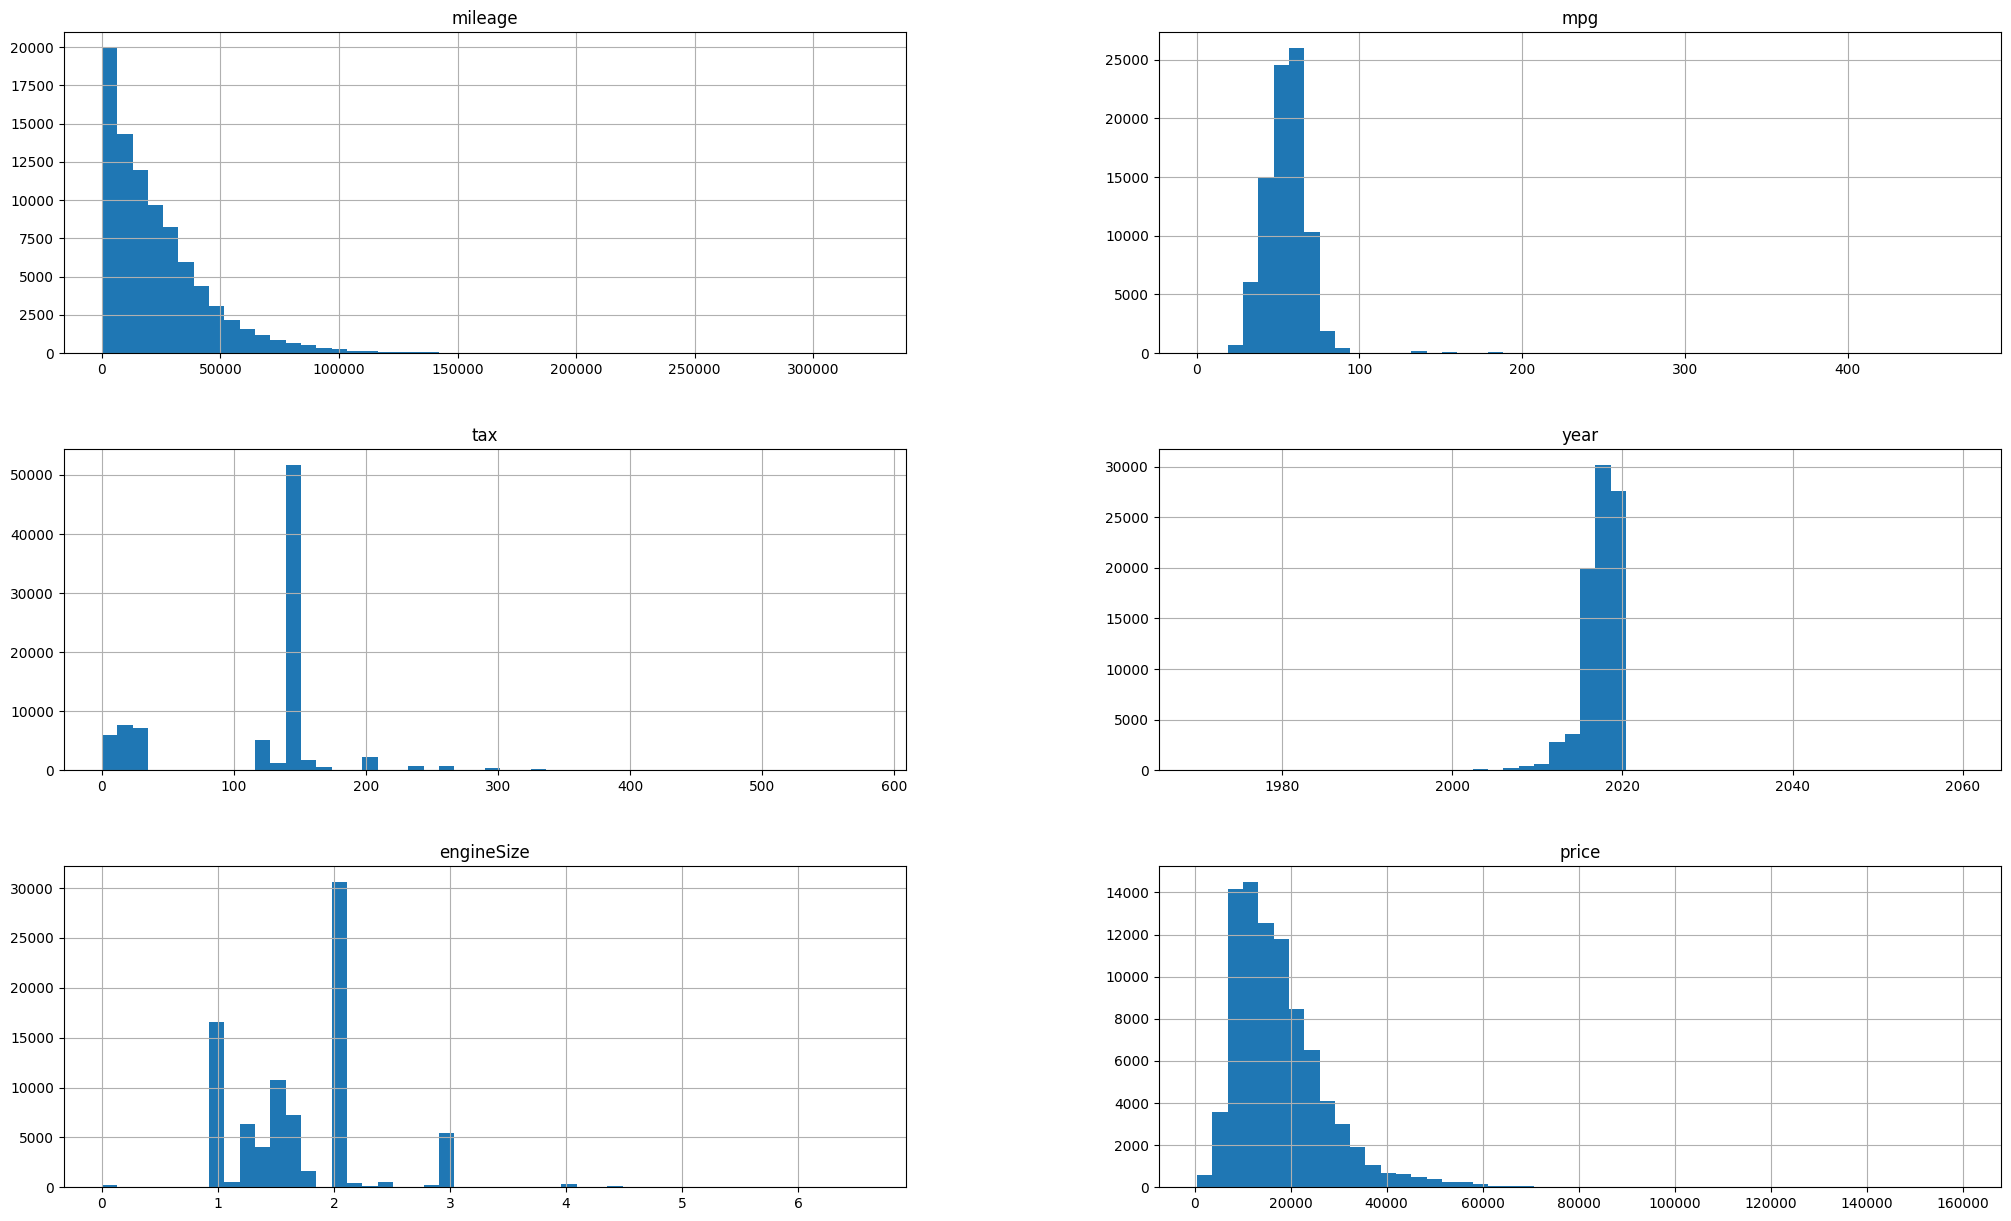

In [45]:
df.hist(bins=50,figsize=(25,15))
plt.show()

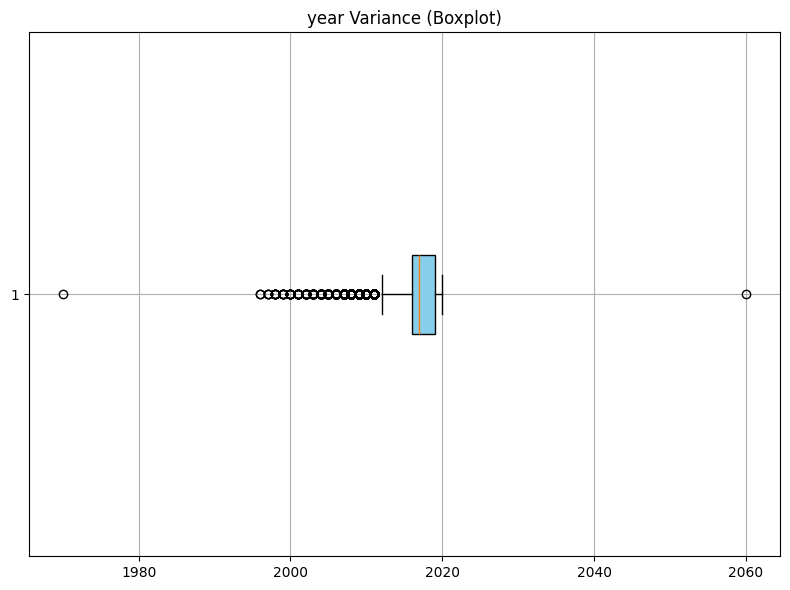

In [46]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['year'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('year Variance (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
df=(df[df["year"]>2009])

In [48]:
df=(df[df["year"]<2025])

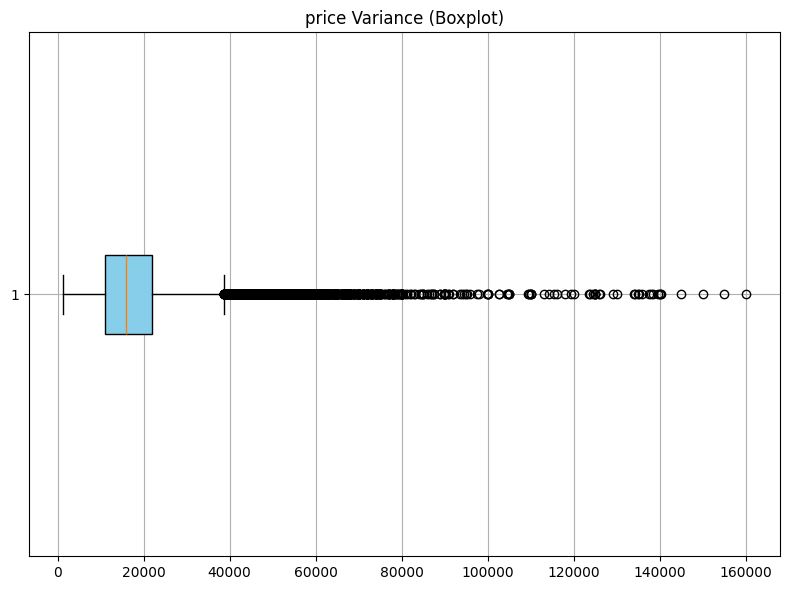

In [49]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('price Variance (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
df=(df[df["price"]<65000])

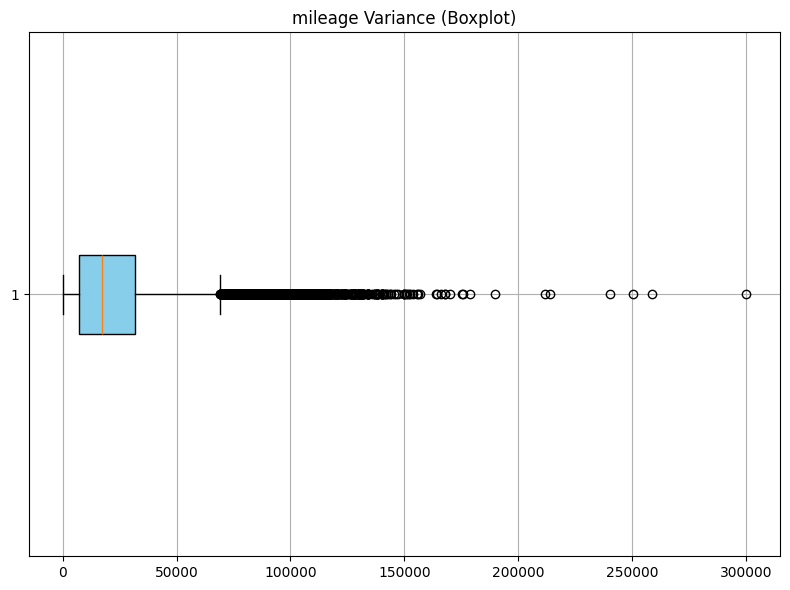

In [51]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['mileage'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('mileage Variance (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
df=(df[df["mileage"]<130000])

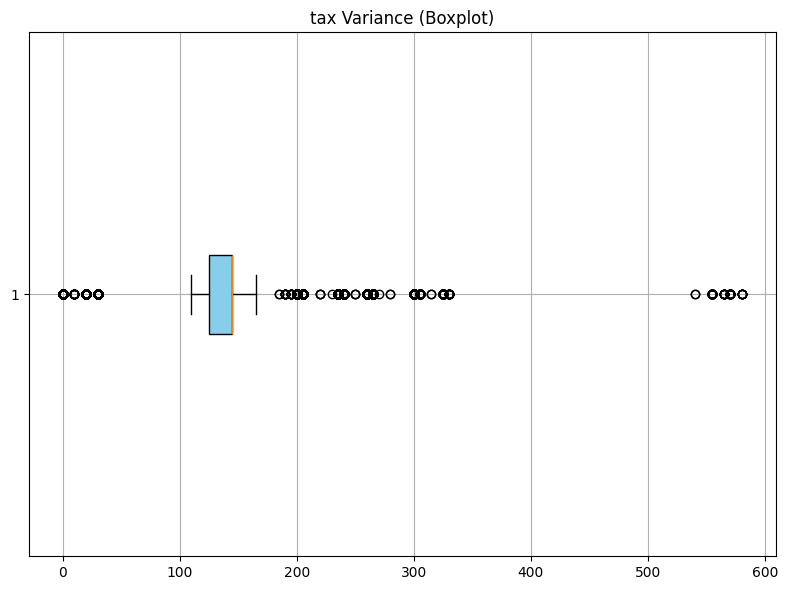

In [53]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['tax'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('tax Variance (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
df=(df[df["tax"]<350])

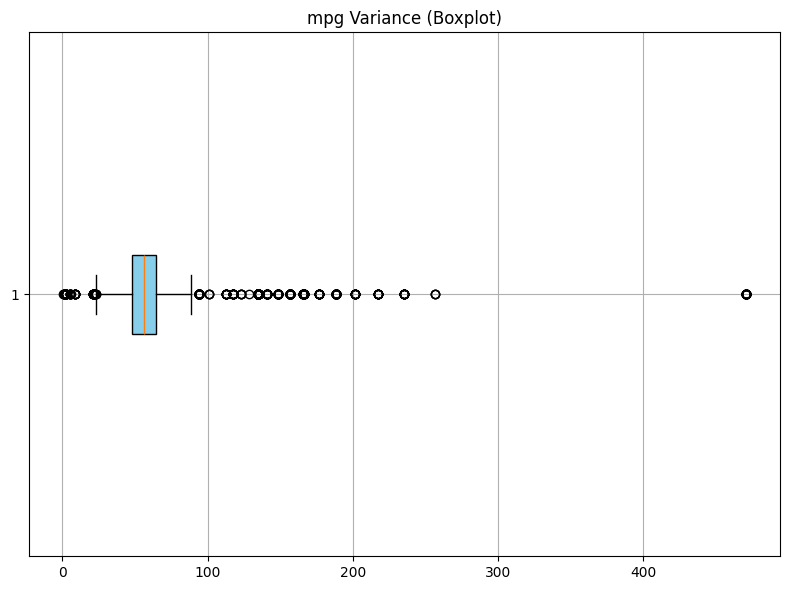

In [55]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['mpg'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('mpg Variance (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
df=(df[df["mpg"]<90])

In [57]:
df=(df[df["mpg"]>20])

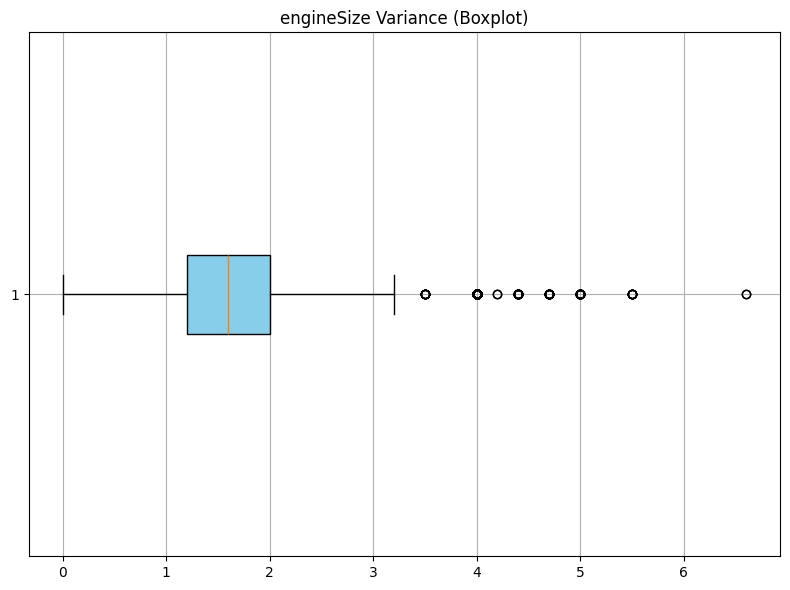

In [58]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['engineSize'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('engineSize Variance (Boxplot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
df=(df[df["engineSize"]>0.1])

In [60]:
df=(df[df["engineSize"]<3.5])

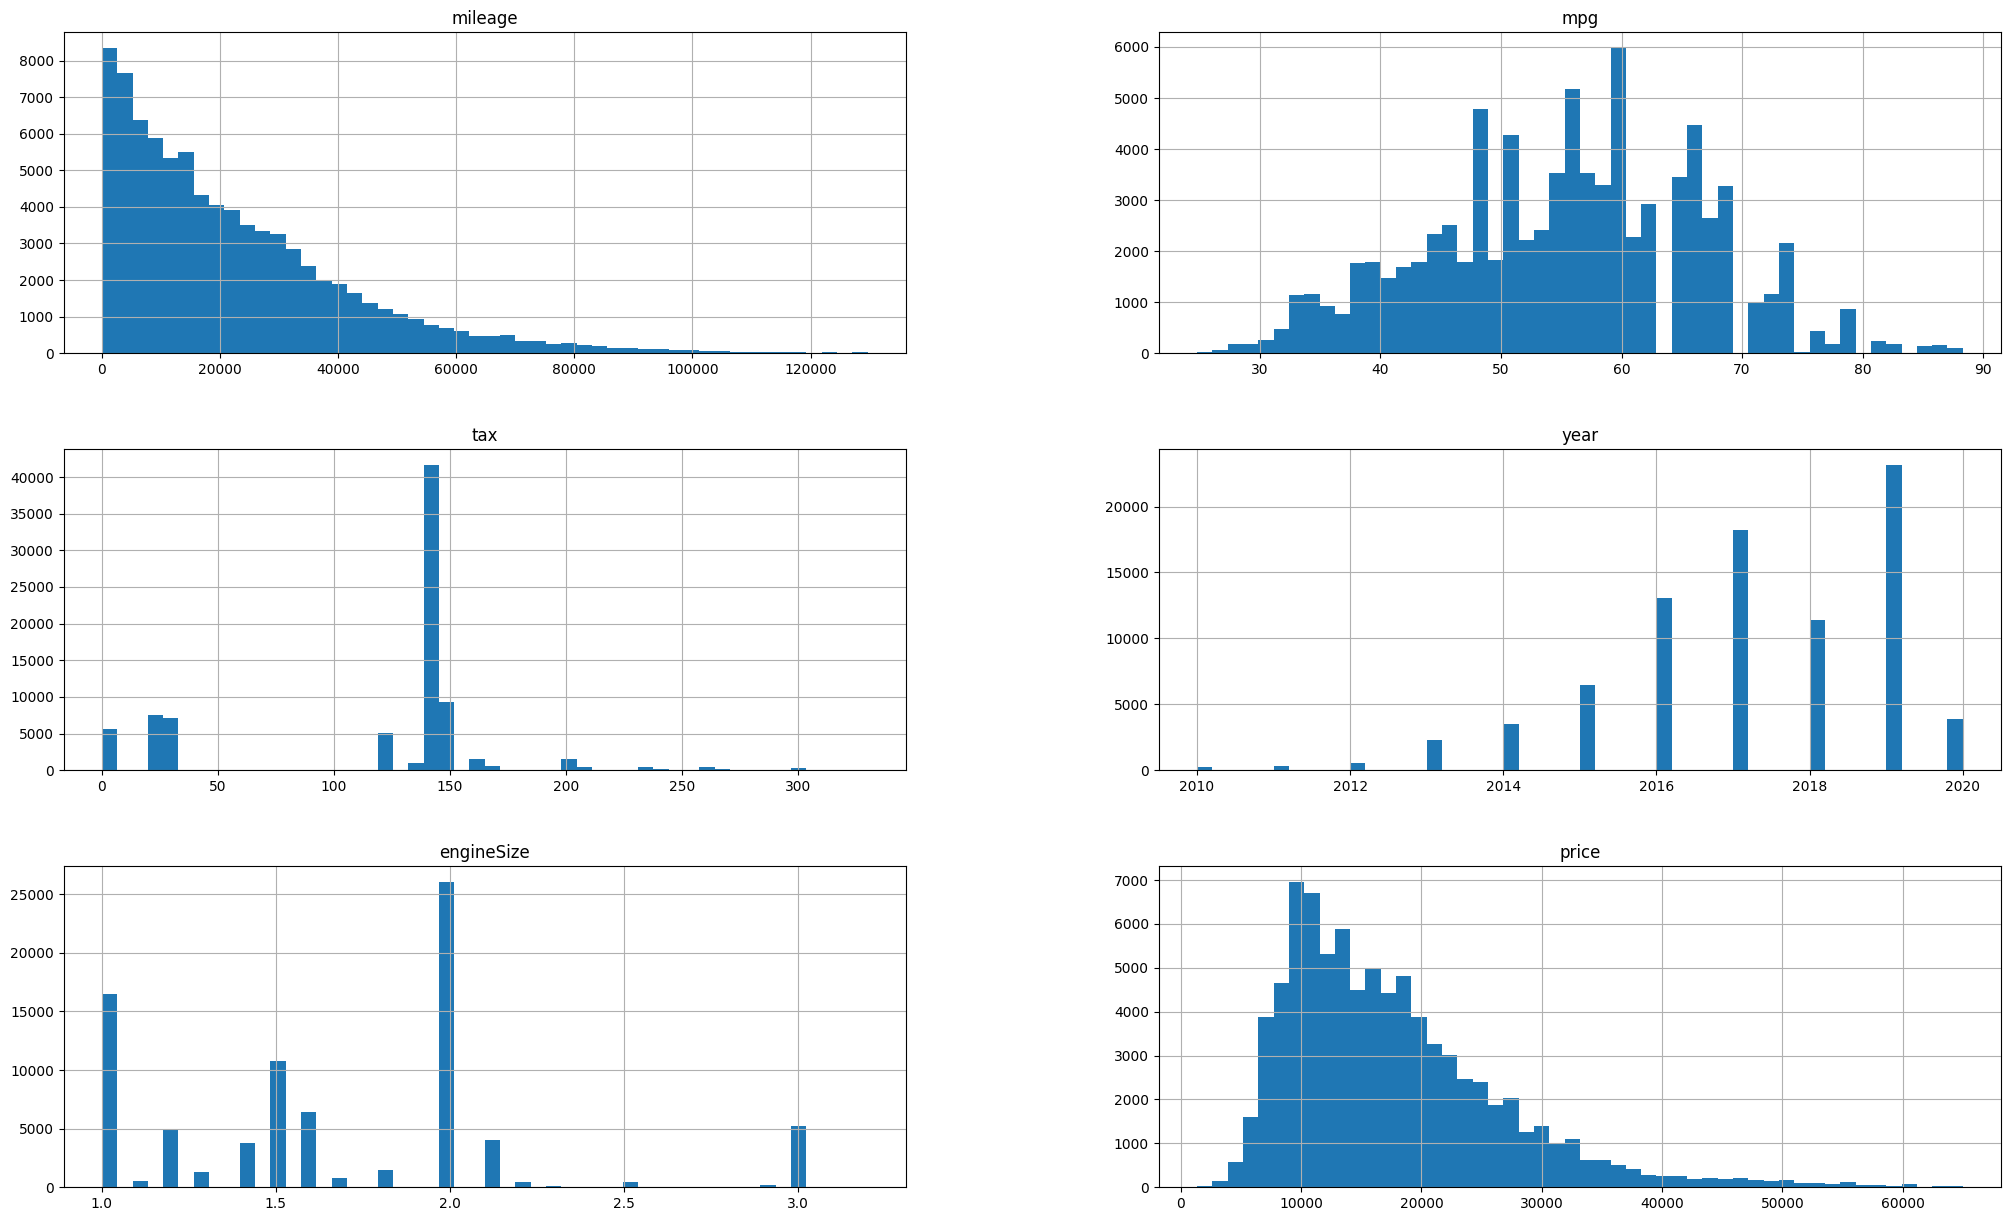

In [61]:
df.hist(bins=50,figsize=(25,15))
plt.show()

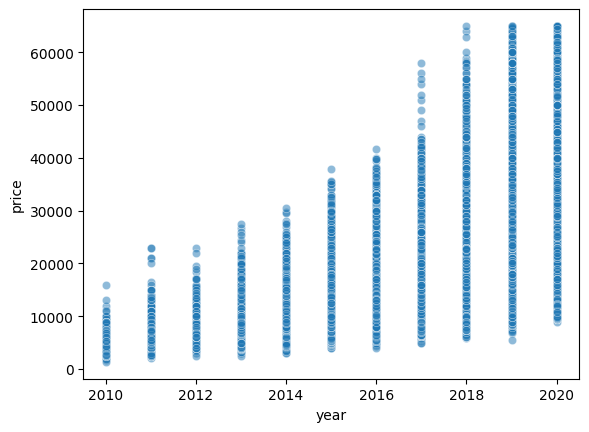

In [62]:
sns.scatterplot(x = "year", y = "price",alpha=0.5, data = df);

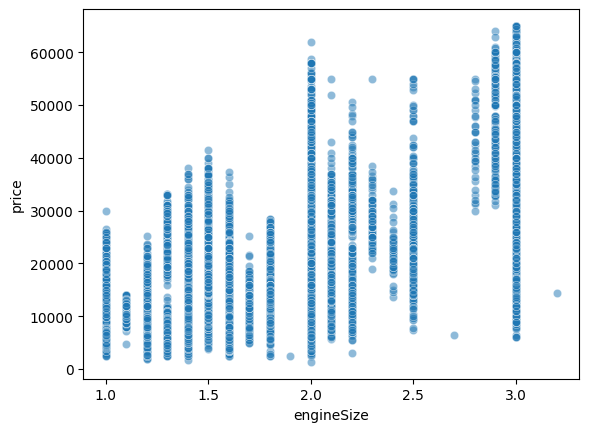

In [63]:
sns.scatterplot(x = "engineSize", y = "price",alpha=0.5, data = df);

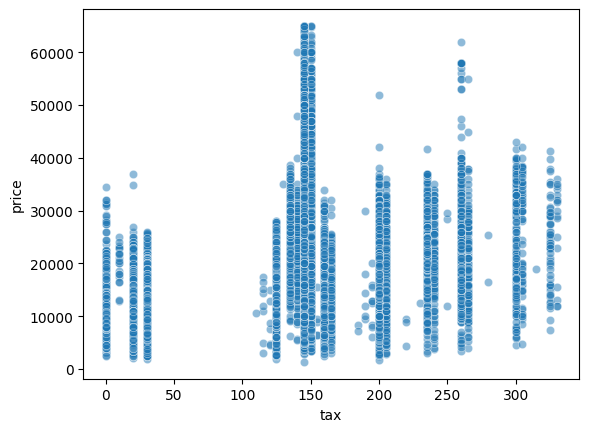

In [64]:
sns.scatterplot(x = "tax", y = "price",alpha=0.5, data = df);

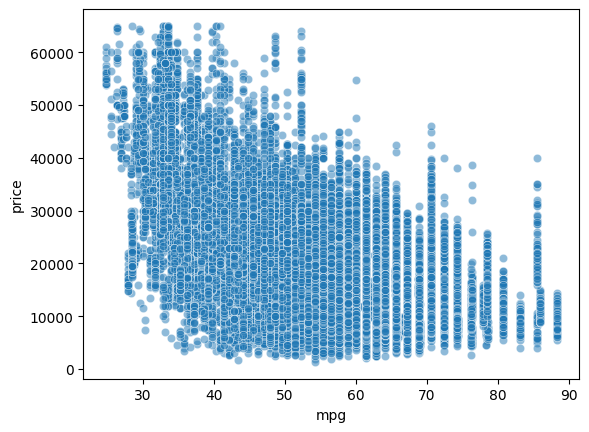

In [65]:
sns.scatterplot(x = "mpg", y = "price",alpha=0.5, data = df);

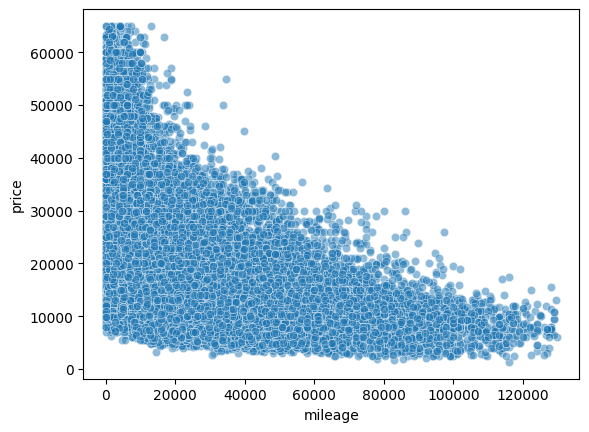

In [66]:
sns.scatterplot(x = "mileage", y = "price",alpha=0.5, data = df);

In [67]:
X = df.drop(columns=['price'])
y = df['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (66414, 47)
X_test shape: (16604, 47)
y_train shape: (66414,)
y_test shape: (16604,)


In [68]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [69]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2210.332559426168

In [70]:
r2_score(y_test, y_pred)

0.9413087756382106

In [71]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [72]:
xgb_grid = {
     'colsample_bytree': [0.8,0.9,1], 
     'n_estimators':[800,1000,1200],
     'max_depth': [5,6,7],
     'learning_rate': [0.05, 0.1, 0.2]
}

In [73]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 5, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [800, 1000, 1200]},
             verbose=2)

In [74]:
xgb_cv.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 1200}

In [75]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.8, 
                         learning_rate = 0.1, 
                         max_depth = 7, 
                         n_estimators = 1200) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [76]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2005.0605253520312

In [77]:
r2_score(y_test, y_pred)

0.9517038067087775